## Portfolio optimization: 
# Maximize mean daily return with trade-off for portfolio variance. Long-only positions with a flexible upper bound (default 10%) on individual asset weights

### Classical (Markowitz) portfolio optimization with upper bound on asset weight

We do a simple variation of classical (Markowitz) portfolio optimization solving the optimization problem

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w \in {\cal W},\\
& w \geq 0,\\
& w \leq .1,
\end{array}

where $\mu$ is the vector of average daily asset returns (for each asset), $\Sigma$ is the covariance matrix (of daily asset returns), $w \in {\bf R}^n$ is the optimization variable (the asset weights), $w \geq 0$ implies long-only portfolios, and $\gamma >0$ is the *risk aversion parameter*.

The objective $\mu^Tw - \gamma w^T\Sigma w$ is the *risk-adjusted return* where $\mu^Tw$ is the expected (mean) return and $\gamma w^T\Sigma w$ is the variance of the portfolio. Varying $\gamma$ gives the optimal *risk-return trade-off*. 

The gamma ($\gamma$) parameter specifies our risk-return trade-off. I solve this for a bunch of $\gamma$ values and get a bunch of different optimal portfolios. This gives us a trade-off curve, on which we can choose our operating point. I didn't go into how to find the right $\gamma$ yet, since we probably want to spice this up before getting into tedious details. 

# Pip install cvxpy, which does the optimization. 

In [ ]:
!pip install cvxpy #run this and it will install.

# Imports

In [1]:
import numpy as np
import scipy.sparse as sp
import cvxpy as cp
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Stock list example
all_tickers = ["VOO",
"TTC",
"LRCX",
"IDXX",
"ABNB",
"COUP",
"ADSK",
"BAND",
"ASML",
"WEX",
"GMED",
"ZM",
"DXCM",
"NICE",
"ACN",
"NFLX",
"NBIX",
"SEDG",
"JKHY",
"WM",
"SNPS",
"ZNGA",
"HRC",
"NTDOY",
"HA",
"TLK",
"ZBRA",
"AMZN",
"UNP",
"ALK",
"BB",
"AMGN",
"NEWR",
"CRUS",
"FICO",
"OKTA",
"MTN",
"CME",
"HCA",
"MMM",
"JD",
"CGNX",
"TXT",
"ODFL",
"FTNT",
"BDX",
"TSCO",
"NVDA",
"MASI",
"JBLU"]

In [14]:
df = data.DataReader(all_tickers, 'yahoo', start='2007/01/01', end='2011/12/31')
df.head()

/Users/z004mns/opt/anaconda3/envs/voila_env/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ABNB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/z004mns/opt/anaconda3/envs/voila_env/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'COUP', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/z004mns/opt/anaconda3/envs/voila_env/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BAND', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/z004mns/opt/anaconda3/envs/voila_env/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GMED', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/z004mns/opt/anaconda3/envs/voila_env/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read

Attributes Adj Close                                                        \
Symbols          VOO       TTC       LRCX       IDXX       ADSK       ASML   
Date                                                                         
2007-01-03       NaN  7.455880  44.203541  19.552500  40.560001  17.452383   
2007-01-04       NaN  7.544040  46.402096  19.844999  41.330002  17.645744   
2007-01-05       NaN  7.522005  46.339516  20.247499  41.930000  17.724520   
2007-01-08       NaN  7.507834  45.830105  20.434999  41.799999  17.925037   
2007-01-09       NaN  7.537745  45.740719  20.410000  42.320000  17.731676   

Attributes                                     ...     Volume                 \
Symbols       WEX  DXCM       NICE        ACN  ...       JBLU ABNB COUP BAND   
Date                                           ...                             
2007-01-03  31.25  9.88  28.508566  27.472965  ...  6240200.0  NaN  NaN  NaN   
2007-01-04  32.27  9.79  29.276249  28.092205  ...  5690200.0  NaN  NaN  NaN   
2007-01-05  31.50  9.68  29.484758  27.699514  ...  5095600.0  NaN  NaN  NaN   
2007-01-08  30.73  9.64  29.001398  28.099758  ...  6401200.0  NaN  NaN  NaN   
2007-01-09  31.00  9.42  28.906620  28.031782  ...  5695400.0  NaN  NaN  NaN   

Attributes                              
Symbols    GMED  ZM SEDG NEWR OKTA  JD  
Date                                    
2007-01-03  NaN NaN  NaN  NaN  NaN NaN  
2007-01-04  NaN NaN  NaN  NaN  NaN NaN  
2007-01-05  NaN NaN  NaN  NaN  NaN NaN  
2007-01-08  NaN NaN  NaN  NaN  NaN NaN  
2007-01-09  NaN NaN  NaN  NaN  NaN NaN  

[5 rows x 300 columns]

In [15]:
# Closing prices
df = df.dropna(axis=1)['Adj Close']
df.head()

Symbols,TTC,LRCX,IDXX,ADSK,ASML,WEX,DXCM,NICE,ACN,NFLX,...,MTN,CME,MMM,CGNX,TXT,ODFL,BDX,TSCO,NVDA,JBLU
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,7.455880,44.203541,19.552500,40.560001,17.452383,31.25,9.88,28.508566,27.472965,3.801429,...,36.830479,63.408928,52.713810,5.021545,43.925961,7.503140,55.013428,10.091452,22.102251,15.20
2007-01-04,7.544040,46.402096,19.844999,41.330002,17.645744,32.27,9.79,29.276249,28.092205,3.621428,...,36.936993,63.869690,52.505001,5.071364,43.510918,7.814318,54.560387,10.188506,21.998100,15.38
2007-01-05,7.522005,46.339516,20.247499,41.930000,17.724520,31.50,9.68,29.484758,27.699514,3.544286,...,36.281494,64.169128,52.148006,4.930207,43.450947,7.538038,54.677563,10.585546,20.619778,14.99
2007-01-08,7.507834,45.830105,20.434999,41.799999,17.925037,30.73,9.64,29.001398,28.099758,3.404286,...,36.297882,64.851746,52.262505,4.994557,43.446342,7.540946,55.029064,10.294380,20.772921,15.14
2007-01-09,7.537745,45.740719,20.410000,42.320000,17.731676,31.00,9.42,28.906620,28.031782,3.427143,...,36.543690,65.226357,52.323135,4.940585,43.303394,7.558397,55.638329,10.563487,20.368614,15.21


# Inputs to the optimization : mean daily returns and covariance matrix of daily returns

In [16]:
mu_series = df.pct_change().mean()
mu = mu_series.values
Sigma = df.pct_change().cov().values

# Formulate the optimization problem with constraints

In [46]:
dict([('a',5),('b',6)])

{'a': 5, 'b': 6}

In [51]:
# Long only portfolio optimization.
w = cp.Variable(mu.shape[0])          #Portfolio weights
gamma = cp.Parameter(nonneg=True)     #Trade-off parameter.
ret = mu.T@w                          #mean return, given a portfolio w
risk = cp.quad_form(w, Sigma)         #risk (portfolio variance), given a portfolio w
prob = cp.Problem(cp.Maximize(ret - gamma*risk), #maximize the weighted combo of risk (portfolio variance) and returns.
               [cp.sum(w) == 1,       #portfolio weights must sum up to one.
                w >= 0,               #only long positions. 
               w <= .1])              #no single asset makes up more than 10% of our portfolio

In [52]:
# Compute trade-off curve.
SAMPLES = 100 #This is how many gamma values we try. Each gives a new portfolio on the optimal frontier. 
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
portfolios = {}
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    print(f'Portfolio Composition for gamma = {gamma.value}')
    portfolios[gamma.value] = dict([(mu_series.index[i],w.value[i]) for i in range(mu.shape[0]) if w.value[i] > .0001])
    print('Weights:',portfolios[gamma.value])
    print('Expected Return: ', ret.value)
    print('Portfolio Standard Deviation: ', cp.sqrt(risk).value)
    print('\n'*3)
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value

Portfolio Composition for gamma = 0.01
Weights: {'DXCM': 0.10000014760207637, 'NFLX': 0.09999985971972669, 'NBIX': 0.0999980676501599, 'HA': 0.10000016589764066, 'AMZN': 0.09999979131777323, 'UNP': 0.10000018166678915, 'ALK': 0.10000019729447196, 'CRUS': 0.10000046674337076, 'ODFL': 0.1000002126280362, 'TSCO': 0.0999998550716367}
Expected Return:  0.0012086212467134645
Portfolio Standard Deviation:  0.022635773418063578




Portfolio Composition for gamma = 0.011233240329780276
Weights: {'DXCM': 0.09999705904290049, 'NFLX': 0.0999991614943786, 'NBIX': 0.09999987579979641, 'HA': 0.09999793370857021, 'AMZN': 0.09999872594834591, 'UNP': 0.1000001614280315, 'ALK': 0.09999760811939862, 'CRUS': 0.09999736617927232, 'ODFL': 0.09999825415788005, 'TSCO': 0.10000020226253949}
Expected Return:  0.001208613126075551
Portfolio Standard Deviation:  0.022635531545869




Portfolio Composition for gamma = 0.012618568830660204
Weights: {'DXCM': 0.0999999988976041, 'NFLX': 0.10000000249834211, 'NBIX': 0

Portfolio Composition for gamma = 4.750810162102798
Weights: {'TTC': 0.06227548241275856, 'IDXX': 0.1, 'ACN': 0.1, 'NFLX': 0.08426910469031197, 'WM': 0.028375186644038045, 'SNPS': 0.07299453246807071, 'HRC': 0.050313945641164516, 'AMZN': 0.09472184794233451, 'UNP': 0.10000000000000002, 'AMGN': 0.1, 'MMM': 0.007049900201321511, 'BDX': 0.1, 'TSCO': 0.1}
Expected Return:  0.0007645560689460477
Portfolio Standard Deviation:  0.015119959374063501




Portfolio Composition for gamma = 5.336699231206307
Weights: {'TTC': 0.05344205852235668, 'IDXX': 0.1, 'ACN': 0.1, 'NFLX': 0.07680922757228321, 'WM': 0.04053048340809122, 'SNPS': 0.08729462211026938, 'HRC': 0.04784339489279768, 'AMZN': 0.07519821476207751, 'UNP': 0.10000000000000002, 'AMGN': 0.1, 'MMM': 0.018881998732124334, 'BDX': 0.1, 'TSCO': 0.1}
Expected Return:  0.0007227641510332403
Portfolio Standard Deviation:  0.01484248130254014




Portfolio Composition for gamma = 5.994842503189409
Weights: {'TTC': 0.045580960271378625, 'IDXX': 0.1,

# This is the trade-off curve. The green line gives the standard deviation and expected return for all optimal portfolios (for each chosen value of $\gamma$)

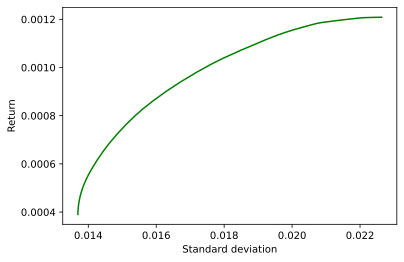

In [53]:
# Plot long only trade-off curve.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

# Calculate returns of a portfolio if held over a specified time range (cumulative returns)

In [76]:
def get_annualized_return(portfolio, 
               asset_data = None,          #option to pass through data so we don't have to download it
               start_date = '2011/12/31' , #default time range
               end_date = '2020/12/31'):   #default time range
    if asset_data is None:
        asset_data = data.DataReader(list(portfolio.keys()), 'yahoo', start=start_date, end=end_date)
        asset_data = asset_data['Adj Close']

    df_return = (asset_data.iloc[-1] - asset_data.iloc[0])/asset_data.iloc[0]

    portfolio_return = sum( df_return[asset]*portfolio[asset] for asset in portfolio.keys() )

    return portfolio_return , asset_data


In [73]:
for portfolio in portfolios.values():
    portfolio_return , _ = get_return(portfolio)
    print(portfolio_return)